# Decision Tree 

In [49]:
import pandas as pd
import numpy as np
from IPython.display import Image

In [50]:
import os
os.chdir(r"C:\Users\전우진\Desktop\2020-1\데이터마이닝\발표관련\tree_gain_ratio")
workingdir = os.path.join(os.getcwd(), '.')
os.chdir(os.path.join(workingdir, 'modules' ))

In [51]:
# dataset 소환
data = pd.read_csv(r'./churn.csv')
data

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,target
0,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,HI,50,area_code_408,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,0
4996,WV,152,area_code_415,no,no,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3,1
4997,DC,61,area_code_415,no,no,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1,0
4998,DC,109,area_code_510,no,no,0,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,8.5,6,2.30,0,0


In [52]:
# y 기준 내림차순 정렬
data.sort_values(by="target", ascending=True, inplace=True)

# index 재설정
data = data.reset_index(drop=True)

In [53]:
data

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,target
0,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,WI,93,area_code_415,no,no,0,152.1,141,25.86,215.5,107,18.32,262.4,111,11.81,12.0,7,3.24,1,0
2,OK,149,area_code_510,yes,no,0,180.9,79,30.75,194.9,83,16.57,197.8,109,8.90,8.8,9,2.38,3,0
3,WV,23,area_code_510,no,yes,31,156.6,84,26.62,161.5,96,13.73,294.6,107,13.26,9.4,6,2.54,1,0
4,SD,221,area_code_510,no,yes,24,180.5,85,30.69,224.1,92,19.05,205.7,103,9.26,2.4,3,0.65,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,AZ,102,area_code_510,no,no,0,171.6,116,29.17,219.4,111,18.65,242.1,85,10.89,12.1,4,3.27,0,1
4996,TX,112,area_code_510,no,no,0,242.1,69,41.16,235.2,150,19.99,237.7,106,10.70,10.0,5,2.70,3,1
4997,TX,75,area_code_415,yes,no,0,222.4,78,37.81,327.0,111,27.80,208.0,104,9.36,8.7,9,2.35,1,1
4998,OK,44,area_code_408,no,no,0,288.8,86,49.10,175.9,87,14.95,215.4,106,9.69,9.5,2,2.57,0,1


In [54]:
# target data 이름 넣기 #
target_att = 'target'

X = data.loc[:, data.columns != target_att]
y = data.loc[:, data.columns == target_att]

In [55]:
np.unique(data['target'])

array([0, 1], dtype=int64)

In [56]:
X

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,WI,93,area_code_415,no,no,0,152.1,141,25.86,215.5,107,18.32,262.4,111,11.81,12.0,7,3.24,1
2,OK,149,area_code_510,yes,no,0,180.9,79,30.75,194.9,83,16.57,197.8,109,8.90,8.8,9,2.38,3
3,WV,23,area_code_510,no,yes,31,156.6,84,26.62,161.5,96,13.73,294.6,107,13.26,9.4,6,2.54,1
4,SD,221,area_code_510,no,yes,24,180.5,85,30.69,224.1,92,19.05,205.7,103,9.26,2.4,3,0.65,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,AZ,102,area_code_510,no,no,0,171.6,116,29.17,219.4,111,18.65,242.1,85,10.89,12.1,4,3.27,0
4996,TX,112,area_code_510,no,no,0,242.1,69,41.16,235.2,150,19.99,237.7,106,10.70,10.0,5,2.70,3
4997,TX,75,area_code_415,yes,no,0,222.4,78,37.81,327.0,111,27.80,208.0,104,9.36,8.7,9,2.35,1
4998,OK,44,area_code_408,no,no,0,288.8,86,49.10,175.9,87,14.95,215.4,106,9.69,9.5,2,2.57,0


In [57]:
# 기존 sklearn에 구현된 모델용 설정 # 

## y의 name 
target_att = 'target'

## x의 name
in_feature = list(data.columns [data.columns != target_att])

## data column 중 categorical variable 찾기
cate_col = [col for col in in_feature if not np.issubdtype(X[col].dtype, \
    np.number)]

## X의 string 값을 dummey variable로 변환 
X_dummies= pd.get_dummies(X.loc[:,in_feature], columns=cate_col)
feature_names = X_dummies.columns

## y의 string 값을 numeric으로 변환 
y, class_names = pd.factorize(data[target_att])

from sklearn.model_selection import train_test_split  
## train, test = 8:2, random split
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, test_size=0.2, )

In [58]:
feature_names

Index(['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'state_AK', 'state_AL', 'state_AR',
       'state_AZ', 'state_CA', 'state_CO', 'state_CT', 'state_DC', 'state_DE',
       'state_FL', 'state_GA', 'state_HI', 'state_IA', 'state_ID', 'state_IL',
       'state_IN', 'state_KS', 'state_KY', 'state_LA', 'state_MA', 'state_MD',
       'state_ME', 'state_MI', 'state_MN', 'state_MO', 'state_MS', 'state_MT',
       'state_NC', 'state_ND', 'state_NE', 'state_NH', 'state_NJ', 'state_NM',
       'state_NV', 'state_NY', 'state_OH', 'state_OK', 'state_OR', 'state_PA',
       'state_RI', 'state_SC', 'state_SD', 'state_TN', 'state_TX', 'state_UT',
       'state_VA', 'state_VT', 'state_WA', '

In [59]:
y, class_names

(array([0, 0, 0, ..., 1, 1, 1], dtype=int64),
 Int64Index([0, 1], dtype='int64'))

In [60]:
X_train

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,...,state_WI,state_WV,state_WY,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
4968,78,0,71.5,126,12.16,166.8,127,14.18,211.6,86,...,0,0,0,0,1,0,0,1,1,0
2564,108,30,276.6,99,47.02,220.1,113,18.71,177.9,95,...,0,0,0,0,0,1,1,0,0,1
4338,128,0,237.9,125,40.44,247.6,93,21.05,208.9,68,...,0,0,0,0,1,0,1,0,1,0
1740,93,0,172.4,133,29.31,205.6,77,17.48,245.8,126,...,0,0,0,0,0,1,0,1,1,0
4297,102,48,134.0,83,22.78,234.3,128,19.92,197.3,107,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4223,153,0,122.5,145,20.83,273.3,103,23.23,197.8,71,...,0,0,0,0,0,1,1,0,1,0
2701,98,0,162.8,65,27.68,185.0,109,15.73,219.5,104,...,0,0,0,0,1,0,1,0,1,0
4938,87,0,322.5,106,54.83,204.6,93,17.39,186.2,128,...,0,0,0,1,0,0,1,0,1,0
2108,135,45,241.4,102,41.04,206.4,78,17.54,196.6,104,...,0,0,0,0,1,0,1,0,0,1


## 여기서 부터 "구현한" 코드에 대한 설명 ##

### 경로설정 ###

In [61]:
import os
os.chdir(r"C:\Users\전우진\Desktop\2020-1\데이터마이닝\발표관련\tree_gain_ratio")
workingdir = os.path.join(os.getcwd(), '.')
os.chdir(os.path.join(workingdir, 'modules' )) 

In [62]:
os.getcwd()

'C:\\Users\\전우진\\Desktop\\2020-1\\데이터마이닝\\발표관련\\tree_gain_ratio\\modules'

### 파일 컴파일 ###

In [63]:
# entropy_gain을 구하기 위한 .py파일 # 총 4개(파일 4개가 연동되어있으니 수정은 삼가해주길 바람)
from usertree import userTree as utr
import utils

### 기본 파라미터 설정 및 데이터 스플릿 ###

In [64]:
# DT termination criteria #
## MAX_DEPTH: 기존 모델의 max_depth와 같음
## min_samples_leaf: 기존모델의 min_samples_leaf와 같음
# -> MAX_DEPTH는 변경불가 
MAX_DEPTH = 1000

sample_ratio = 0.03
min_sample_leaf = round(sample_ratio * len(X_train))

# data를 data frame형태로 train, test로 나눔
train_idx, test_idx = X_train.index, X_test.index
train, test = data.loc[train_idx,:], data.loc[test_idx,:]

In [65]:
train

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,target
4968,TN,78,area_code_415,yes,no,0,71.5,126,12.16,166.8,127,14.18,211.6,86,9.52,8.3,2,2.24,3,1
2564,LA,108,area_code_510,no,yes,30,276.6,99,47.02,220.1,113,18.71,177.9,95,8.01,9.8,6,2.65,2,0
4338,NJ,128,area_code_415,no,no,0,237.9,125,40.44,247.6,93,21.05,208.9,68,9.40,13.9,4,3.75,1,1
1740,VA,93,area_code_510,yes,no,0,172.4,133,29.31,205.6,77,17.48,245.8,126,11.06,9.1,9,2.46,1,0
4297,NY,102,area_code_408,no,yes,48,134.0,83,22.78,234.3,128,19.92,197.3,107,8.88,7.8,4,2.11,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4223,NJ,153,area_code_510,no,no,0,122.5,145,20.83,273.3,103,23.23,197.8,71,8.90,8.0,3,2.16,2,0
2701,TN,98,area_code_415,no,no,0,162.8,65,27.68,185.0,109,15.73,219.5,104,9.88,6.0,3,1.62,2,0
4938,SC,87,area_code_408,no,no,0,322.5,106,54.83,204.6,93,17.39,186.2,128,8.38,9.4,4,2.54,2,1
2108,MA,135,area_code_415,no,yes,45,241.4,102,41.04,206.4,78,17.54,196.6,104,8.85,9.4,6,2.54,0,0


### 모델 생성 ###
> min sample leaf, max depth, params(entropy, gini, entropy_GR 중 하나) 순으로 알맞게 넣음

-> simplify는 꼭 True로 설정해주세요.

In [66]:
# 모델 생성 #
## min_samples_leaf: 노드의 최소 데이터 수
## MAX_DEPTH: 나무의 가지 수
## params: 분기기준 -> entropy, gini, entropy_GR 총 3개 사용가능
## simplify: 각 어떤 노드를 기준으로 child node로 분기 했을 때 child node의 분기 예측값이 같다면 분기하지않고 이전 노드를 유지함
# -> simplify는 True로 설정해주세요.

#CART_gini_ins = utr(min_sample_leaf, MAX_DEPTH, params ='entropy', simplify=True)
CART_gini_ins = utr(min_sample_leaf, MAX_DEPTH, params ='gini', simplify=True)
#CART_gini_ins = utr(min_sample_leaf, MAX_DEPTH, params ='entropy_GR', simplify=True)

### 모델 피팅 ###
> train data와 data의 target 이름을 각각 넣음

In [67]:
# 모델 피팅 # 
## train: dataframe형태로 된 data
## target_attribute_name: target data로 설정된 y값 이름
gini_tree, gini_pprint_tree = CART_gini_ins.fit(train, target_attribute_name = "target")  

In [68]:
## CART_entropy_GR_tree: tree에서 분리된 노드들의 분기기준과 data의 index, target(=class)가 출력 -> 성능측정용
## CART_entropy_GR_graph_tree: tree 그래프를 생성하기 위한 값 저장 
CART_gini_tree, CART_gini_graph_tree = \
                CART_gini_ins.tree, CART_gini_ins.graph_tree

In [69]:
CART_gini_graph_tree

{'[label="total_day_minutes < 265.70000000000005\\nsamples = 4000\\nsamples/class = [3443, 557]"] ;': {'[label="number_customer_service_calls < 3.5\\nsamples = 3757\\nsamples/class = [3346, 411]"] ;': {'[label="international_plan != no\\nsamples = 3463\\nsamples/class = [3192, 271]"] ;': {'[label="total_intl_minutes < 11.25\\nsamples = 323\\nsamples/class = [207, 116]"] ;': '[label="predict = 0\\nhomogeneity = 0.766\\ncoverage = 0.05\\nsamples/class = [154, 47]"] ;',
    '[label="total_intl_minutes >= 11.25\\nsamples = 323\\nsamples/class = [207, 116]"] ;': '[label="predict = 1\\nhomogeneity = 0.566\\ncoverage = 0.03\\nsamples/class = [53, 69]"] ;'},
   '[label="international_plan == no\\nsamples = 3463\\nsamples/class = [3192, 271]"] ;': '[label="predict = 0\\nhomogeneity = 0.951\\ncoverage = 0.785\\nsamples/class = [2985, 155]"] ;'},
  '[label="number_customer_service_calls >= 3.5\\nsamples = 3757\\nsamples/class = [3346, 411]"] ;': {'[label="total_day_minutes < 163.15\\nsamples = 29

### 그래프 생성 ###
> CART_gini_ins.graph.tree_to_graph에 CART_gini_graph_tree를 넣고 node와 edge에 대한 데이터를 생성한 뒤, \
> node와 edge에 "\n"을 덫붙여서 tree graph를 생성함.

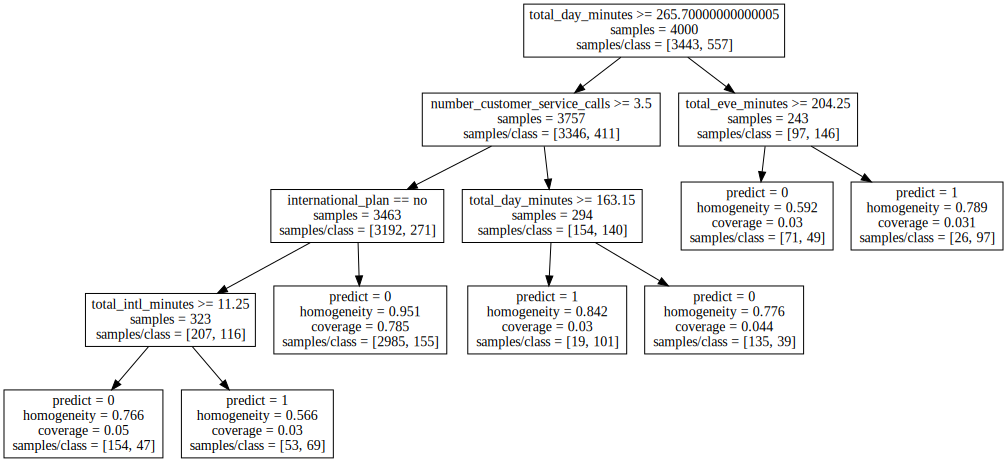

In [70]:
import graphviz
graph_dir = 'graph'
node, edge = CART_gini_ins.graph.tree_to_graph(CART_gini_graph_tree)
tree_graph = graphviz.Source(node + edge+'\n}')
tree_graph

# 유의사항: 왼쪽 화살표가 False, 오른쪽 화살표가 True임

In [71]:
# PDF 파일 출력 #
graph_dir = 'graph'
split = 'geni'
d_set_name = 'churn3'

tree_graph.render('{}/CART_{}_{}_test'.format(graph_dir, split,d_set_name))

'graph\\CART_geni_churn3_test.pdf'

## 성능 측정 ##
> CART_gini_ins.predict에 Dataframe형태의 x,y가 동시에 존재하는 train or test data와 이전에 선언한 CART_entropy_GR_tree를 넣으면, \
> predict, predict probability가 각각 생성됨 

In [24]:
# 성능측정 #
## train predict ##
train_CART_gini_all_pred, train_CART_gini_all_pred_prob \
    = CART_gini_ins.predict(train, CART_gini_tree)

## test predict ## 
test_CART_gini_all_pred, test_CART_gini_all_pred_prob \
    = CART_gini_ins.predict(test, CART_gini_tree)

> utils.perform_check에 train or test data의 y값, predict, probability, class의 갯수,  CLASS_DICT_를 넣으면 \
> train or test data의 [accuracy, recall, precision, f1, auc] 순으로 값이 생성 


In [25]:
# y의 name 넣기 
classes = np.unique(train['quality'])

# perform_check에 순서대로 train set의 y, train_CART_entropy_GR_all_pred, 
train_CART_gini_all_met = utils.perform_check(train['quality'], \
         train_CART_gini_all_pred, \
         train_CART_gini_all_pred_prob,\
         len(classes), CART_gini_ins.CLASS_DICT_)

# 
test_CART_gini_all_met = utils.perform_check(test['quality'], \
         test_CART_gini_all_pred, \
         test_CART_gini_all_pred_prob, \
         len(classes), CART_gini_ins.CLASS_DICT_)

KeyError: 'quality'

In [ ]:
# [accuracy, recall, precision, f1, auc] 순
train_CART_entropy_GR_all_met

In [ ]:
# [accuracy, recall, precision, f1, auc] 순
test_CART_entropy_GR_all_met

### [accuracy, recall, precision, f1, auc] 순

In [ ]:
perform_base_str = '{} : ACCURACY :{}, RECALL :{}, PRECISION : {}, F1 : {}, AUC : {}'
print(perform_base_str.format('\nMetric\n ', \
            *np.round(np.array(train_CART_entropy_GR_all_met), 3)))

In [ ]:
perform_base_str = '{} : ACCURACY :{}, RECALL :{}, PRECISION : {}, F1 : {}, AUC : {}'
print(perform_base_str.format('\nMetric\n ', \
            *np.round(np.array(test_CART_entropy_GR_all_met), 3)))

## 구현한 코드 모델과 기존 sklearn 모델과 비교하고 싶으면 아래를 참조해주세요

In [ ]:
# split criterion이 gini일 때 #
from sklearn.tree import DecisionTreeClassifier

max_depth = 1000
sample_ratio = 0.03
min_sample_leaf = round(sample_ratio * len(X_train))

dtc =DecisionTreeClassifier(criterion = 'gini', max_depth=max_depth, random_state=0,
                                min_samples_leaf=min_sample_leaf) 

dtc.fit(X_train,y_train)

In [ ]:
from sklearn.externals.six import StringIO
import pydotplus
from sklearn import tree
from IPython.display import Image

In [ ]:
# 문자열 데이터를 저장하는 역할
dot_file =StringIO()

# export_graphviz: tree 시각화용
# tree.export_graphviz: reg_tree - 해당 model, feature_names - feature 이름, special_characters - 
tree.export_graphviz(dtc, feature_names=X_train.columns, out_file = dot_file, \
                     filled =True, rounded=True)

# Data를 graph로 표시하기 위해 Dot class로 변환
graph=pydotplus.graph_from_dot_data(dot_file.getvalue())

#dot_file.getvalue(): 데이터가 어떻게 들어가는지 볼 수 있음.
dot_file.getvalue() 

Image(graph.create_png())